# Visualizations for Training RMSE - ARCH

**Summary:**

The analysis below explores the 


In [2]:
import os
from pathlib import Path
import pandas as pd

# Get the notebook's directory path
notebook_dir = Path(os.getcwd())

# Get the project root directory (2 levels up from notebook)
project_root = notebook_dir.parent.parent
results_dir = project_root / "results/processed"
print(results_dir)

/home/cjrisi/Projects/diabetes/nocturnal-hypo-gly-prob-forecast/results/processed


In [3]:
def parse_model_id(df):
    # Split on hyphens and create a dictionary of key-value pairs
    def parse_id(model_id):
        parts = model_id.split("-")
        # Initialize dictionary with default values
        result = {
            "model_type": parts[0],
            "p": None,
            "q": None,
            "o": None,
            "lags": None,
            "power": None,
            "dist": None,
            "mean": None,
            "vol": None,
        }

        # Parse each part after "ARCH-"
        for part in parts[1:]:
            if part.startswith("p_"):
                result["p"] = int(part.split("_")[1])
            elif part.startswith("q_"):
                result["q"] = int(part.split("_")[1])
            elif part.startswith("o_"):
                result["o"] = int(part.split("_")[1])
            elif part.startswith("lags_"):
                result["lags"] = int(part.split("_")[1])
            elif part.startswith("power_"):
                result["power"] = float(part.split("_")[1])
            elif part.startswith("dist_"):
                result["dist"] = part.split("_")[1]
            elif part.startswith("mean_"):
                result["mean"] = part.split("_")[1]
            elif part.startswith("vol_"):
                result["vol"] = part.split("_")[1]

        return result

    # Apply parsing to each model_id
    parsed = df["model_id"].apply(parse_id).apply(pd.Series)

    # Combine original dataframe with parsed columns
    return pd.concat([df, parsed], axis=1)

## ARCH Analysis



In [4]:
arch_dir = results_dir / "arch"
print(results_dir)

/home/cjrisi/Projects/diabetes/nocturnal-hypo-gly-prob-forecast/results/processed


### ARCH 5 minutes

In [5]:
arch_dir_05 = arch_dir / "05mins"

### ARCH 15 minutes


In [6]:
arch_dir_15 = arch_dir / "15mins"
arch_15_results = [
    pd.read_csv(arch_dir_15 / file) for file in list(arch_dir_15.glob("*"))
]

#### GARCH Only - Power = 1, Analysis

In [7]:
arch_15_results[1]

,validation_id,model_id,runtime_secs,MeanSquaredError_mean,MeanSquaredError_std
0,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_ged-me...,3.454055,3.629600e+00,1.602667e+00
1,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_ged-me...,2.660990,3.628197e+00,1.601986e+00
2,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_normal...,2.633783,3.667826e+00,1.666904e+00
3,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_normal...,2.448460,3.666264e+00,1.665803e+00
4,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_skewt-...,4.290843,3.592520e+00,1.573987e+00
...,...,...,...,...,...
1291,p06,ARCH-p_5-q_8-o_8-lags_8-power_1-dist_ged-mean_...,1.986947,2.949341e+00,2.167008e+00
1292,p06,ARCH-p_5-q_8-o_8-lags_8-power_1-dist_normal-me...,1.663404,2.934911e+00,2.035163e+00
1293,p06,ARCH-p_5-q_8-o_8-lags_8-power_1-dist_normal-me...,1.623768,2.925367e+00,2.041573e+00
1294,p06,ARCH-p_5-q_8-o_8-lags_8-power_1-dist_skewt-mea...,3.215646,3.877077e+18,1.285780e+19


In [8]:
df = arch_15_results[1]
# Parse the model_id column
df = parse_model_id(df)

# Optional: Drop the original model_id column if you don't need it anymore
# df = df.drop('model_id', axis=1)

##### Error Distribution Type

In [9]:
# View the unique values in each column
print("Unique error distribution types:", df["dist"].unique())
print("Unique mean models:", df["mean"].unique())
print("Unique volatility models:", df["vol"].unique())

# Get average performance by distribution type
print("\nAverage MSE by error distribution type:")
print(df.groupby("dist")["MeanSquaredError_mean"].mean())
print("\nAverage deviation of MSE by error distribution type:")
print(df.groupby("dist")["MeanSquaredError_std"].mean())

# Get best performance by distribution type
print("\nMinimum MSE by error distribution type:")
print(df.groupby("dist")["MeanSquaredError_mean"].min())
print("\nMinimum deviation of MSE by error distribution type:")
print(df.groupby("dist")["MeanSquaredError_std"].min())

Unique error distribution types: ['ged' 'normal' 'skewt']
Unique mean models: ['AR' 'HARX']
Unique volatility models: ['GARCH']

Average MSE by error distribution type:
dist
ged       6.479856e+50
normal    2.963063e+00
skewt              inf
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by error distribution type:
dist
ged        2.149125e+51
normal     1.510388e+00
skewt     1.285290e+148
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by error distribution type:
dist
ged       2.187559
normal    2.192625
skewt     2.094690
Name: MeanSquaredError_mean, dtype: float64

Minimum deviation of MSE by error distribution type:
dist
ged       0.800989
normal    0.739600
skewt     0.735403
Name: MeanSquaredError_std, dtype: float64


**Conclusion:** For the ARCH family of models there is no justifyable reason to consider error distribution models which are non-gaussian. Most non-gaussian distributions do not improve over the gaussian distribution, even in the beneficial extremes, and lead to severe numerical instability in the negative extremes.

##### Mean Model Type

In [10]:
df_gaussian = df[df["dist"] == "normal"]
# View the unique values in each column
print("Unique error distribution types:", df_gaussian["dist"].unique())
print("Unique mean models:", df_gaussian["mean"].unique())
print("Unique volatility models:", df_gaussian["vol"].unique())

# Get average performance by distribution type
print("\nAverage MSE by mean models type:")
print(df_gaussian.groupby(["validation_id", "mean"])["MeanSquaredError_mean"].mean())
print("\nAverage deviation of MSE by mean models type:")
print(df_gaussian.groupby(["validation_id", "mean"])["MeanSquaredError_std"].mean())

# Get best performance by distribution type
print("\nMinimum MSE by mean models type:")
print(df_gaussian.groupby(["validation_id", "mean"])["MeanSquaredError_mean"].min())
print("\nMinimum deviation of MSE by mean models type:")
print(df_gaussian.groupby(["validation_id", "mean"])["MeanSquaredError_std"].min())

Unique error distribution types: ['normal']
Unique mean models: ['AR' 'HARX']
Unique volatility models: ['GARCH']

Average MSE by mean models type:
validation_id  mean
p01            AR      3.644704
               HARX    3.645532
p05            AR      2.277655
               HARX    2.274807
p06            AR      2.970045
               HARX    2.965634
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by mean models type:
validation_id  mean
p01            AR      1.674997
               HARX    1.674092
p05            AR      0.823054
               HARX    0.823054
p06            AR      2.031856
               HARX    2.035272
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by mean models type:
validation_id  mean
p01            AR      3.555007
               HARX    3.555054
p05            AR      2.192625
               HARX    2.198341
p06            AR      2.921829
               HARX    2.920327
Name: MeanSquaredError_mean, dtype: float64

Min

##### Volatility Model Type

In [11]:
print("Unique error distribution types:", df_gaussian["dist"].unique())
print("Unique mean models:", df_gaussian["mean"].unique())
print("Unique volatility models:", df_gaussian["vol"].unique())

# Get average performance by distribution type
print("\nAverage MSE by vol model type:")
print(df_gaussian.groupby(["validation_id", "vol"])["MeanSquaredError_mean"].mean())
print("\nAverage deviation of MSE by vol model type:")
print(df_gaussian.groupby(["validation_id", "vol"])["MeanSquaredError_std"].mean())

# Get best performance by distribution type
print("\nMinimum MSE by vol model type:")
print(df_gaussian.groupby(["validation_id", "vol"])["MeanSquaredError_mean"].min())
print("\nMinimum deviation of MSE by error distribution type:")
print(df_gaussian.groupby(["validation_id", "vol"])["MeanSquaredError_std"].min())

Unique error distribution types: ['normal']
Unique mean models: ['AR' 'HARX']
Unique volatility models: ['GARCH']

Average MSE by vol model type:
validation_id  vol  
p01            GARCH    3.645118
p05            GARCH    2.276231
p06            GARCH    2.967839
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by vol model type:
validation_id  vol  
p01            GARCH    1.674544
p05            GARCH    0.823054
p06            GARCH    2.033564
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by vol model type:
validation_id  vol  
p01            GARCH    3.555007
p05            GARCH    2.192625
p06            GARCH    2.920327
Name: MeanSquaredError_mean, dtype: float64

Minimum deviation of MSE by error distribution type:
validation_id  vol  
p01            GARCH    1.637492
p05            GARCH    0.739600
p06            GARCH    2.001274
Name: MeanSquaredError_std, dtype: float64


##### Lag Settings Performance Analysis

The remaining analysis on the ARCH family of models will be on lags. We will only focus on the best settings (normal, AR, GARCH) for the remainder of the ARCH analysis.

In [12]:
df_gaussian_ar = df_gaussian[df_gaussian["mean"] == "AR"]
df_gaussian_ar

,validation_id,model_id,runtime_secs,MeanSquaredError_mean,MeanSquaredError_std,model_type,p,q,o,lags,power,dist,mean,vol
2,p01,ARCH-p_12-q_12-o_4-lags_12-power_1-dist_normal...,2.633783,3.667826,1.666904,ARCH,12,12,4,12,1.0,normal,AR,GARCH
8,p01,ARCH-p_12-q_12-o_4-lags_16-power_1-dist_normal...,3.010032,3.678556,1.667548,ARCH,12,12,4,16,1.0,normal,AR,GARCH
14,p01,ARCH-p_12-q_12-o_4-lags_20-power_1-dist_normal...,3.133272,3.673011,1.710144,ARCH,12,12,4,20,1.0,normal,AR,GARCH
20,p01,ARCH-p_12-q_12-o_4-lags_24-power_1-dist_normal...,3.799520,3.650813,1.692879,ARCH,12,12,4,24,1.0,normal,AR,GARCH
26,p01,ARCH-p_12-q_12-o_4-lags_28-power_1-dist_normal...,5.020772,3.715349,1.686842,ARCH,12,12,4,28,1.0,normal,AR,GARCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,p06,ARCH-p_5-q_8-o_8-lags_16-power_1-dist_normal-m...,2.711484,2.944083,2.062041,ARCH,5,8,8,16,1.0,normal,AR,GARCH
1274,p06,ARCH-p_5-q_8-o_8-lags_20-power_1-dist_normal-m...,3.162903,2.986007,2.027896,ARCH,5,8,8,20,1.0,normal,AR,GARCH
1280,p06,ARCH-p_5-q_8-o_8-lags_24-power_1-dist_normal-m...,3.506144,2.996693,2.023815,ARCH,5,8,8,24,1.0,normal,AR,GARCH
1286,p06,ARCH-p_5-q_8-o_8-lags_28-power_1-dist_normal-m...,3.881583,2.982187,2.040936,ARCH,5,8,8,28,1.0,normal,AR,GARCH


In [13]:
print(
    "Unique p's (lag order of the symmetric innovation):", df_gaussian_ar["p"].unique()
)
print("Unique q's (lag order of the lagged volatility):", df_gaussian_ar["q"].unique())
print(
    "Unique o's (lag order of the asymmetric innovation):", df_gaussian_ar["o"].unique()
)
print("Unique lags:", df_gaussian_ar["lags"].unique())

Unique p's (lag order of the symmetric innovation): [12  5]
Unique q's (lag order of the lagged volatility): [12  4  8]
Unique o's (lag order of the asymmetric innovation): [4 8]
Unique lags: [12 16 20 24 28  8]


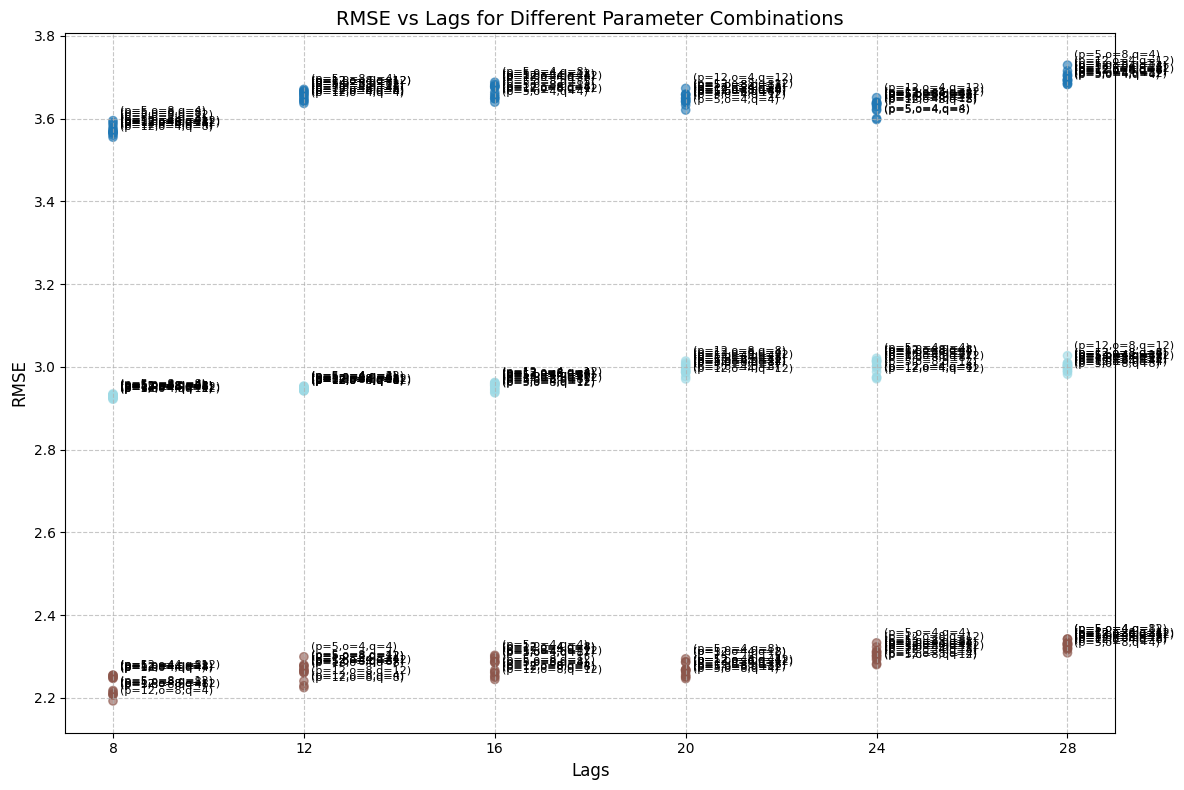

In [14]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'results' with columns: 'p', 'q', 'o', 'rmse'
# If not, you'll need to create/load your results first

plt.figure(figsize=(12, 8))
validation_codes = pd.Categorical(df_gaussian_ar["validation_id"]).codes
# Create scatter plot with different colors for different parameter combinations
scatter = plt.scatter(
    df_gaussian_ar["lags"],
    df_gaussian_ar["MeanSquaredError_mean"],
    c=validation_codes,
    cmap="tab20",  # A colormap good for categorical data
    alpha=0.6,
)

# Customize the plot
plt.xlabel("Lags", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE vs Lags for Different Parameter Combinations", fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Optional: Add annotations for specific points
for idx, row in df_gaussian_ar.iterrows():
    plt.annotate(
        f"(p={int(row.p)},o={int(row.o)},q={int(row.q)})",
        (row.lags, row.MeanSquaredError_mean),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=8,
    )

# Set specific x-axis ticks
plt.xticks([8, 12, 16, 20, 24, 28])

plt.tight_layout()
plt.show()

**Observation:** For the ARCH models on our problem, increasing the number of lags is degrading performance for every patient in the dataset (there are 3). So we can just focus on the lower lag models to get a better understanding of how p, o, and q impact performance.

In [15]:
df_gaussian_ar_8lags = df_gaussian_ar[df_gaussian_ar["lags"] == 8]
df_gaussian_ar_8lags

,validation_id,model_id,runtime_secs,MeanSquaredError_mean,MeanSquaredError_std,model_type,p,q,o,lags,power,dist,mean,vol
32,p01,ARCH-p_12-q_12-o_4-lags_8-power_1-dist_normal-...,2.221723,3.569775,1.643520,ARCH,12,12,4,8,1.0,normal,AR,GARCH
68,p01,ARCH-p_12-q_12-o_8-lags_8-power_1-dist_normal-...,3.117752,3.565291,1.650431,ARCH,12,12,8,8,1.0,normal,AR,GARCH
104,p01,ARCH-p_12-q_4-o_4-lags_8-power_1-dist_normal-m...,1.382035,3.560164,1.637492,ARCH,12,4,4,8,1.0,normal,AR,GARCH
140,p01,ARCH-p_12-q_4-o_8-lags_8-power_1-dist_normal-m...,2.126525,3.567419,1.649995,ARCH,12,4,8,8,1.0,normal,AR,GARCH
176,p01,ARCH-p_12-q_8-o_4-lags_8-power_1-dist_normal-m...,1.673193,3.555007,1.642369,ARCH,12,8,4,8,1.0,normal,AR,GARCH
212,p01,ARCH-p_12-q_8-o_8-lags_8-power_1-dist_normal-m...,2.579587,3.565088,1.649968,ARCH,12,8,8,8,1.0,normal,AR,GARCH
248,p01,ARCH-p_5-q_12-o_4-lags_8-power_1-dist_normal-m...,1.320814,3.567746,1.656000,ARCH,5,12,4,8,1.0,normal,AR,GARCH
284,p01,ARCH-p_5-q_12-o_8-lags_8-power_1-dist_normal-m...,2.025618,3.585047,1.640889,ARCH,5,12,8,8,1.0,normal,AR,GARCH
320,p01,ARCH-p_5-q_4-o_4-lags_8-power_1-dist_normal-me...,4.918366,3.573498,1.649364,ARCH,5,4,4,8,1.0,normal,AR,GARCH
356,p01,ARCH-p_5-q_4-o_8-lags_8-power_1-dist_normal-me...,1.300680,3.595224,1.647545,ARCH,5,4,8,8,1.0,normal,AR,GARCH


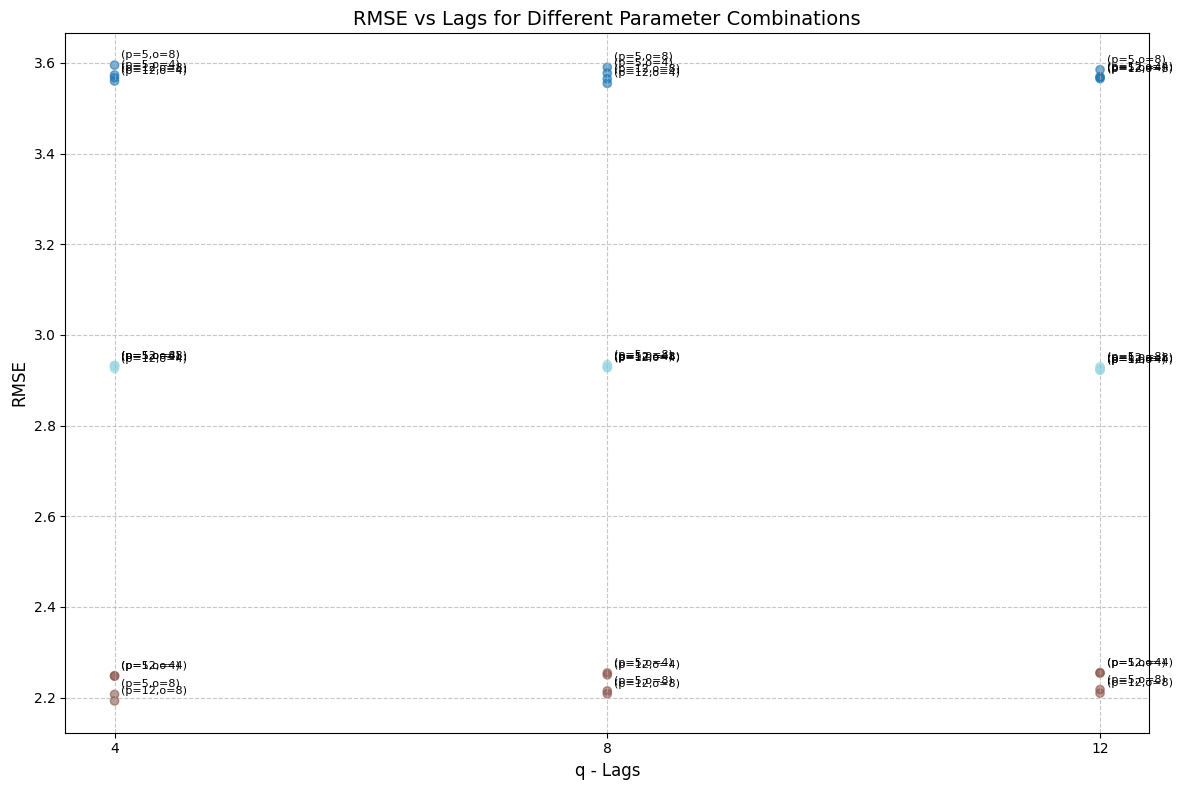

In [16]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'results' with columns: 'p', 'q', 'o', 'rmse'
# If not, you'll need to create/load your results first

plt.figure(figsize=(12, 8))
validation_codes = pd.Categorical(df_gaussian_ar_8lags["validation_id"]).codes
# Create scatter plot with different colors for different parameter combinations
scatter = plt.scatter(
    df_gaussian_ar_8lags["q"],
    df_gaussian_ar_8lags["MeanSquaredError_mean"],
    c=validation_codes,
    cmap="tab20",  # A colormap good for categorical data
    alpha=0.6,
)

# Customize the plot
plt.xlabel("q - Lags", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE vs Lags for Different Parameter Combinations", fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Optional: Add annotations for specific points
for idx, row in df_gaussian_ar_8lags.iterrows():
    plt.annotate(
        f"(p={int(row.p)},o={int(row.o)})",
        (row.q, row.MeanSquaredError_mean),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=8,
    )

# Set specific x-axis ticks
plt.xticks([4, 8, 12])

plt.tight_layout()
plt.show()

###### p - lag

In [17]:
# Get average performance by distribution type
print("\nAverage MSE by p lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "p"])["MeanSquaredError_mean"].mean()
)
print("\nAverage deviation of MSE by vol model type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "p"])["MeanSquaredError_std"].mean()
)

# Get best performance by distribution type
print("\nMinimum MSE by p lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "p"])["MeanSquaredError_mean"].min()
)
print("\nMinimum deviation of MSE by error distribution type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "p"])["MeanSquaredError_std"].min()
)


Average MSE by p lag:
validation_id  p 
p01            5     3.581598
               12    3.563791
p05            5     2.232668
               12    2.227202
p06            5     2.930136
               12    2.927224
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by vol model type:
validation_id  p 
p01            5     1.647889
               12    1.645629
p05            5     0.773501
               12    0.792388
p06            5     2.039654
               12    2.032235
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by p lag:
validation_id  p 
p01            5     3.567746
               12    3.555007
p05            5     2.207008
               12    2.192625
p06            5     2.921829
               12    2.922707
Name: MeanSquaredError_mean, dtype: float64

Minimum deviation of MSE by error distribution type:
validation_id  p 
p01            5     1.640872
               12    1.637492
p05            5     0.755377
               12    0

###### q - lag

In [18]:
# Get average performance by distribution type
print("\nAverage MSE by q lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "q"])["MeanSquaredError_mean"].mean()
)
print("\nAverage deviation of MSE by vol model type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "q"])["MeanSquaredError_std"].mean()
)

# Get best performance by distribution type
print("\nMinimum MSE by p lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "q"])["MeanSquaredError_mean"].min()
)
print("\nMinimum deviation of MSE by error distribution type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "q"])["MeanSquaredError_std"].min()
)


Average MSE by q lag:
validation_id  q 
p01            4     3.574076
               8     3.572042
               12    3.571965
p05            4     2.223783
               8     2.231890
               12    2.234130
p06            4     2.930377
               8     2.930430
               12    2.925232
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by vol model type:
validation_id  q 
p01            4     1.646099
               8     1.646467
               12    1.647710
p05            4     0.777507
               8     0.787448
               12    0.783878
p06            4     2.039061
               8     2.036247
               12    2.032527
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by p lag:
validation_id  q 
p01            4     3.560164
               8     3.555007
               12    3.565291
p05            4     2.192625
               8     2.208489
               12    2.209763
p06            4     2.925761
               8  

###### o - lag

In [19]:
# Get average performance by distribution type
print("\nAverage MSE by o lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "o"])["MeanSquaredError_mean"].mean()
)
print("\nAverage deviation of MSE by vol model type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "o"])["MeanSquaredError_std"].mean()
)

# Get best performance by distribution type
print("\nMinimum MSE by o lag:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "o"])["MeanSquaredError_mean"].min()
)
print("\nMinimum deviation of MSE by error distribution type:")
print(
    df_gaussian_ar_8lags.groupby(["validation_id", "o"])["MeanSquaredError_std"].min()
)


Average MSE by o lag:
validation_id  o
p01            4    3.567298
               8    3.578091
p05            4    2.251490
               8    2.208379
p06            4    2.926560
               8    2.930800
Name: MeanSquaredError_mean, dtype: float64

Average deviation of MSE by vol model type:
validation_id  o
p01            4    1.646901
               8    1.646617
p05            4    0.776874
               8    0.789015
p06            4    2.037907
               8    2.033983
Name: MeanSquaredError_std, dtype: float64

Minimum MSE by o lag:
validation_id  o
p01            4    3.555007
               8    3.565088
p05            4    2.247111
               8    2.192625
p06            4    2.921829
               8    2.926433
Name: MeanSquaredError_mean, dtype: float64

Minimum deviation of MSE by error distribution type:
validation_id  o
p01            4    1.637492
               8    1.640872
p05            4    0.755522
               8    0.755377
p06            4  

**Conclusion:** there does not appear to be a disernable difference in the lower end of p,o,q parameters. Therefore the best models in the GARCH family tend to be AR, with normal error distributions. Usually lower order models are performing better, but a deeper search of the parameter space specifically wiht AR-normal is probably required. We should also try constant, zero, and ls mean models. We could also retry the same set of models with rescaling to see if that improves results. The biggest difference in performance at this point tends to be the variance of the patient's blood glucose that the model is being built on. The plot below shows that model settings might improve the RMSE by ~ 0.1 to 0.2 at most within the AR-normal settings.

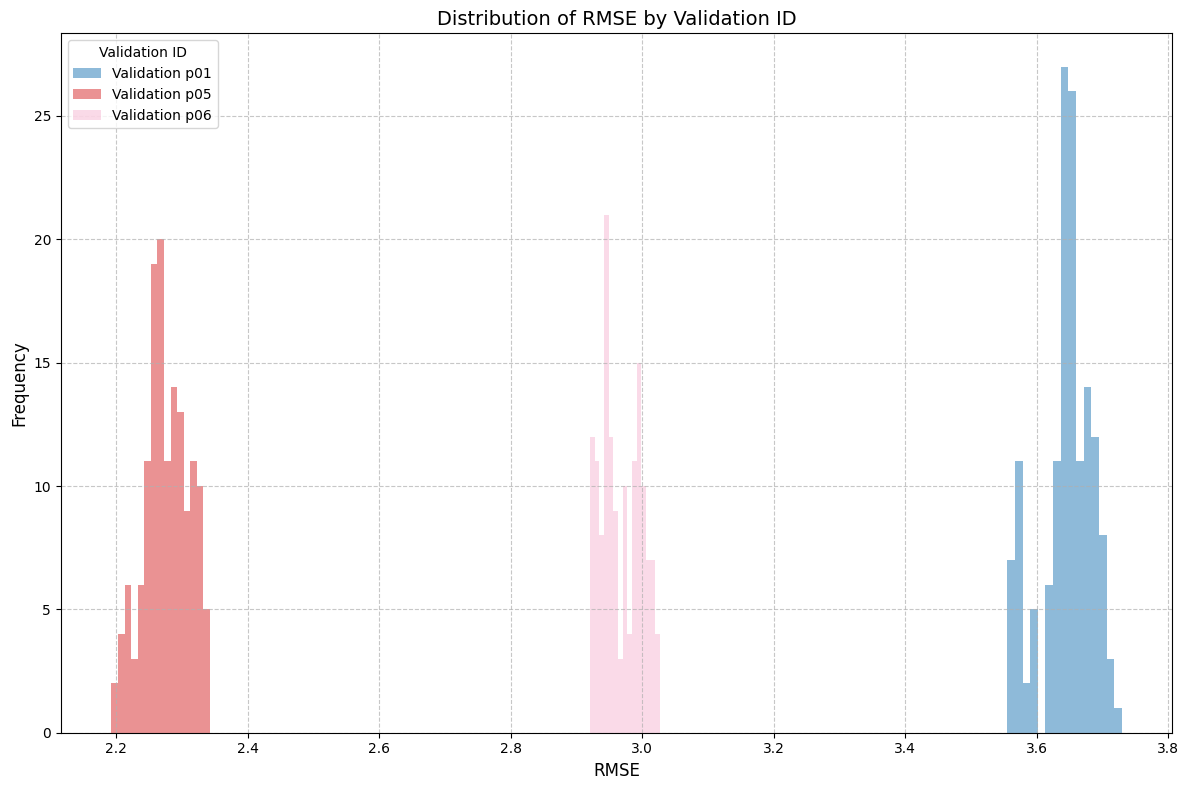

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Get unique validation IDs
unique_validations = sorted(df_gaussian["validation_id"].unique())
num_validations = len(unique_validations)

# Calculate number of bins based on data
num_bins = 15

# Create histogram for each validation_id
for i, val_id in enumerate(unique_validations):
    mask = df_gaussian["validation_id"] == val_id
    plt.hist(
        df_gaussian[mask]["MeanSquaredError_mean"],
        bins=num_bins,
        alpha=0.5,
        label=f"Validation {val_id}",
        color=plt.cm.tab20(i / num_validations),
    )

# Customize the plot
plt.xlabel("RMSE", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of RMSE by Validation ID", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Validation ID")

plt.tight_layout()
plt.show()

## EGARCH, GARCH, HARCH

In [21]:
df = arch_15_results[0]
# Parse the model_id column
df = parse_model_id(df)

# Optional: Drop the original model_id column if you don't need it anymore
# df = df.drop('model_id', axis=1)

### Getting Rid of Poor Fitting Parameters

With the ARCH family of models we saw many settings results in numerical instability and the inability for the models to converge. Some RMSE values > 10^126. In order to have an improved understanding of the general behaviour of the different parameter settings we drop model settings that are > 6 RMSE.

In [22]:
# View the unique values in each column
print("Unique error distribution types:", df["dist"].unique())
print("Unique mean models:", df["mean"].unique())
print("Unique volatility models:", df["vol"].unique())

# Get average performance by distribution type
print("\nMaximum MSE by error distribution:")
print(df.groupby("dist")["MeanSquaredError_mean"].max())
print("\nMaximum MSE by mean models:")
print(df.groupby("mean")["MeanSquaredError_mean"].max())
print("\nMaximum MSE by vol distribution type:")
print(df.groupby("vol")["MeanSquaredError_mean"].max())

Unique error distribution types: ['ged' 'normal']
Unique mean models: ['AR' 'ARX' 'Constant' 'HAR' 'HARX']
Unique volatility models: ['EGARCH' 'GARCH' 'HARCH']

Maximum MSE by error distribution:
dist
ged        3.568118e+85
normal    3.973245e+126
Name: MeanSquaredError_mean, dtype: float64

Maximum MSE by mean models:
mean
AR          3.973245e+126
ARX         3.973245e+126
Constant     4.509674e+00
HAR          3.568118e+85
HARX         3.568118e+85
Name: MeanSquaredError_mean, dtype: float64

Maximum MSE by vol distribution type:
vol
EGARCH    3.973245e+126
GARCH      5.219366e+46
HARCH      9.268857e+35
Name: MeanSquaredError_mean, dtype: float64


In [28]:
df_reduced = df[df["MeanSquaredError_mean"] <= 6]

print(
    "Total models: ",
    len(df),
    ", Kept models: ",
    len(df_reduced),
    ", Removed models: ",
    len(df) - len(df_reduced),
)

Total models:  6480 , Kept models:  6372 , Removed models:  108


### Worst Performers After Drop

In [29]:
# View the unique values in each column
print("Unique error distribution types:", df_reduced["dist"].unique())
print("Unique mean models:", df_reduced["mean"].unique())
print("Unique volatility models:", df_reduced["vol"].unique())

# Get average performance by distribution type
print("\nMaximum MSE by error distribution:")
print(df_reduced.groupby("dist")["MeanSquaredError_mean"].max())
print("\nMaximum MSE by mean models:")
print(df_reduced.groupby("mean")["MeanSquaredError_mean"].max())
print("\nMaximum MSE by vol distribution type:")
print(df_reduced.groupby("vol")["MeanSquaredError_mean"].max())

Unique error distribution types: ['ged' 'normal']
Unique mean models: ['AR' 'ARX' 'Constant' 'HAR' 'HARX']
Unique volatility models: ['EGARCH' 'GARCH' 'HARCH']

Maximum MSE by error distribution:
dist
ged       4.868463
normal    4.509674
Name: MeanSquaredError_mean, dtype: float64

Maximum MSE by mean models:
mean
AR          4.868463
ARX         4.868463
Constant    4.509674
HAR         3.772411
HARX        3.772411
Name: MeanSquaredError_mean, dtype: float64

Maximum MSE by vol distribution type:
vol
EGARCH    4.868463
GARCH     4.509674
HARCH     4.433138
Name: MeanSquaredError_mean, dtype: float64


#### Average Performance After Drop

In [31]:
# View the unique values in each column
print("Unique error distribution types:", df_reduced["dist"].unique())
print("Unique mean models:", df_reduced["mean"].unique())
print("Unique volatility models:", df_reduced["vol"].unique())

# Get average performance by distribution type
print("\nAverage MSE by error distribution:")
print(df_reduced.groupby("dist")["MeanSquaredError_mean"].mean())
print("\nAverage MSE by mean models:")
print(df_reduced.groupby("mean")["MeanSquaredError_mean"].mean())
print("\nAverage MSE by vol distribution type:")
print(df_reduced.groupby("vol")["MeanSquaredError_mean"].mean())

Unique error distribution types: ['ged' 'normal']
Unique mean models: ['AR' 'ARX' 'Constant' 'HAR' 'HARX']
Unique volatility models: ['EGARCH' 'GARCH' 'HARCH']

Average MSE by error distribution:
dist
ged       3.047057
normal    3.056960
Name: MeanSquaredError_mean, dtype: float64

Average MSE by mean models:
mean
AR          2.950356
ARX         2.950356
Constant    3.460066
HAR         2.945334
HARX        2.945334
Name: MeanSquaredError_mean, dtype: float64

Average MSE by vol distribution type:
vol
EGARCH    3.047416
GARCH     3.047697
HARCH     3.060898
Name: MeanSquaredError_mean, dtype: float64


#### Best Performance After Drop

In [32]:
# View the unique values in each column
print("Unique error distribution types:", df_reduced["dist"].unique())
print("Unique mean models:", df_reduced["mean"].unique())
print("Unique volatility models:", df_reduced["vol"].unique())

# Get average performance by distribution type
print("\nBest MSE by error distribution:")
print(df_reduced.groupby("dist")["MeanSquaredError_mean"].min())
print("\nBest MSE by mean models:")
print(df_reduced.groupby("mean")["MeanSquaredError_mean"].min())
print("\nBest MSE by vol distribution type:")
print(df_reduced.groupby("vol")["MeanSquaredError_mean"].min())

Unique error distribution types: ['ged' 'normal']
Unique mean models: ['AR' 'ARX' 'Constant' 'HAR' 'HARX']
Unique volatility models: ['EGARCH' 'GARCH' 'HARCH']

Best MSE by error distribution:
dist
ged       2.175033
normal    2.158420
Name: MeanSquaredError_mean, dtype: float64

Best MSE by mean models:
mean
AR          2.161843
ARX         2.161843
Constant    2.634347
HAR         2.158420
HARX        2.158420
Name: MeanSquaredError_mean, dtype: float64

Best MSE by vol distribution type:
vol
EGARCH    2.158420
GARCH     2.175033
HARCH     2.183618
Name: MeanSquaredError_mean, dtype: float64


The difference between AR vs. ARX and HAR vs HARX is indistinguishable, and both perform better than constant so we can focus the analysis on a subset of those models. 

### After Dropping ARX and HARX

In [33]:
df_reduced_nox = df_reduced[df_reduced["mean"] != "ARX"]
df_reduced_nox = df_reduced_nox[df_reduced_nox["mean"] != "HARX"]
df_reduced_nox = df_reduced_nox[df_reduced_nox["mean"] != "Constant"]

In [34]:
# View the unique values in each column
print("Unique error distribution types:", df_reduced_nox["dist"].unique())
print("Unique mean models:", df_reduced_nox["mean"].unique())
print("Unique volatility models:", df_reduced_nox["vol"].unique())

# Get average performance by distribution type
print("\nBest MSE by error distribution:")
print(df_reduced_nox.groupby("dist")["MeanSquaredError_mean"].min())
print("\nBest MSE by mean models:")
print(df_reduced_nox.groupby("mean")["MeanSquaredError_mean"].min())
print("\nBest MSE by vol distribution type:")
print(df_reduced_nox.groupby("vol")["MeanSquaredError_mean"].min())

Unique error distribution types: ['ged' 'normal']
Unique mean models: ['AR' 'HAR']
Unique volatility models: ['EGARCH' 'GARCH' 'HARCH']

Best MSE by error distribution:
dist
ged       2.175033
normal    2.158420
Name: MeanSquaredError_mean, dtype: float64

Best MSE by mean models:
mean
AR     2.161843
HAR    2.158420
Name: MeanSquaredError_mean, dtype: float64

Best MSE by vol distribution type:
vol
EGARCH    2.158420
GARCH     2.175033
HARCH     2.183618
Name: MeanSquaredError_mean, dtype: float64


In [ ]:
print("\nBest MSE:")
print(df_reduced_nox.groupby(["mean", "vol", "dist"])["MeanSquaredError_mean"].min())


Best MSE by error distribution:
mean  vol     dist  
AR    EGARCH  ged       2.201384
              normal    2.161843
      GARCH   ged       2.179972
              normal    2.191760
      HARCH   ged       2.186953
              normal    2.206272
HAR   EGARCH  ged       2.212681
              normal    2.158420
      GARCH   ged       2.175033
              normal    2.191720
      HARCH   ged       2.183618
              normal    2.206260
Name: MeanSquaredError_mean, dtype: float64


**Observation:** It appears that for both AR, and HAR the best performing models are volatility = EGARCH and error distribution = normal.

We can drill down further to see how lags are impacting the performance of the best models.

### Performance Comparison Across Patients

In [38]:
print("\nBest MSE by error distribution:")
print(
    df_reduced_nox.groupby(["validation_id", "mean", "vol", "dist"])[
        "MeanSquaredError_mean"
    ].min()
)


Best MSE by error distribution:
validation_id  mean  vol     dist  
p01            AR    EGARCH  ged       3.519629
                             normal    3.555104
                     GARCH   ged       3.539356
                             normal    3.513732
                     HARCH   ged       3.628960
                             normal    3.621488
               HAR   EGARCH  ged       3.528978
                             normal    3.543231
                     GARCH   ged       3.539133
                             normal    3.513746
                     HARCH   ged       3.628931
                             normal    3.621484
p05            AR    EGARCH  ged       2.201384
                             normal    2.161843
                     GARCH   ged       2.179972
                             normal    2.191760
                     HARCH   ged       2.186953
                             normal    2.206272
               HAR   EGARCH  ged       2.212681
                   

The HARCH volatilities perform worse for all patients. 

In [41]:
print("\nBest MSE by error distribution:")
df_reduced_nox_nohar = df_reduced_nox[df_reduced_nox["vol"] != "HARCH"]

print(
    df_reduced_nox_nohar.groupby(["validation_id", "mean", "vol", "dist"])[
        "MeanSquaredError_mean"
    ].min()
)


Best MSE by error distribution:
validation_id  mean  vol     dist  
p01            AR    EGARCH  ged       3.519629
                             normal    3.555104
                     GARCH   ged       3.539356
                             normal    3.513732
               HAR   EGARCH  ged       3.528978
                             normal    3.543231
                     GARCH   ged       3.539133
                             normal    3.513746
p05            AR    EGARCH  ged       2.201384
                             normal    2.161843
                     GARCH   ged       2.179972
                             normal    2.191760
               HAR   EGARCH  ged       2.212681
                             normal    2.158420
                     GARCH   ged       2.175033
                             normal    2.191720
p06            AR    EGARCH  ged       2.942513
                             normal    2.913050
                     GARCH   ged       2.944273
                   

**Observation**: For the best performing patients, the normal distribution works best. for the worst performing patients, the ged error distribution is an improvement. This seems to be indicating that those with greater volatility in blood glucose have non-gaussian distributed errors. There also does not seem to be great justificatino for keeping HAR models, only 

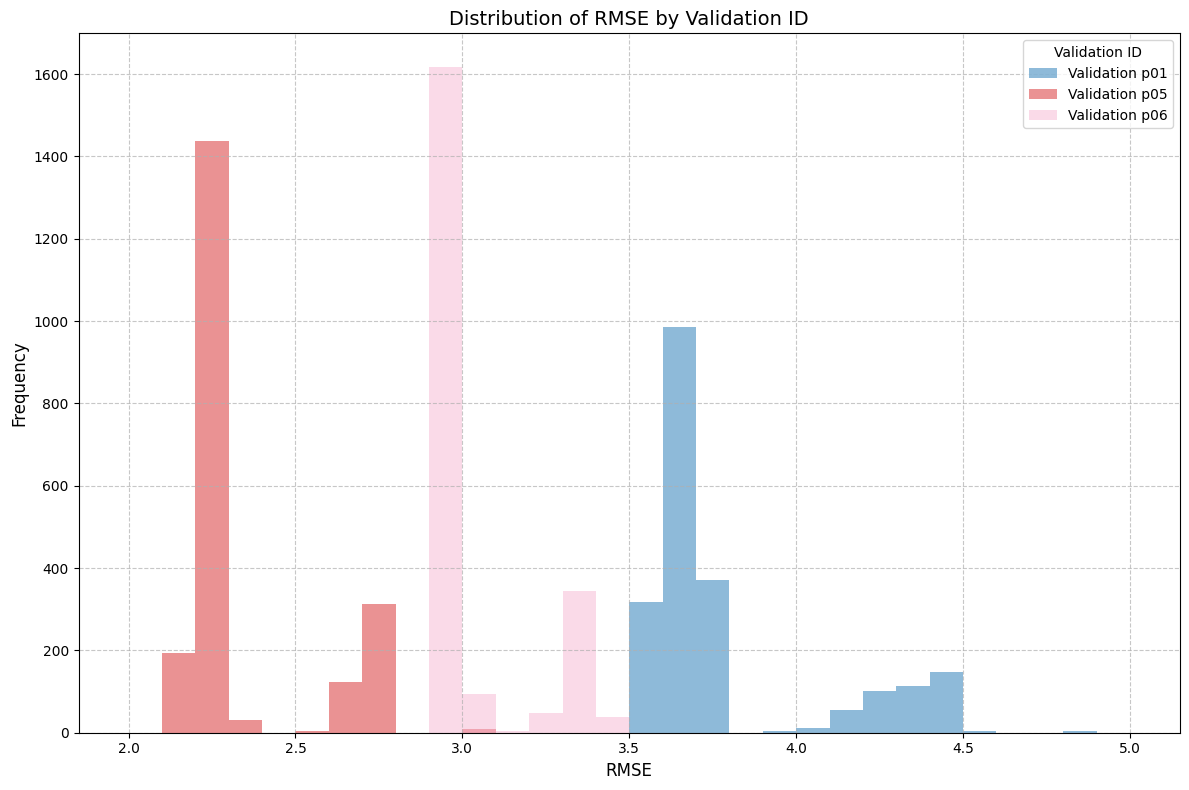

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Get unique validation IDs
unique_validations = sorted(df_reduced["validation_id"].unique())
num_validations = len(unique_validations)

# Calculate number of bins based on data
num_bins = 30
x_range = (2, 5)
# Create histogram for each validation_id
for i, val_id in enumerate(unique_validations):
    mask = df_reduced["validation_id"] == val_id
    plt.hist(
        df_reduced[mask]["MeanSquaredError_mean"],
        bins=num_bins,
        range=x_range,
        alpha=0.5,
        label=f"Validation {val_id}",
        color=plt.cm.tab20(i / num_validations),
    )

# Customize the plot
plt.xlabel("RMSE", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of RMSE by Validation ID", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Validation ID")

plt.tight_layout()
plt.show()

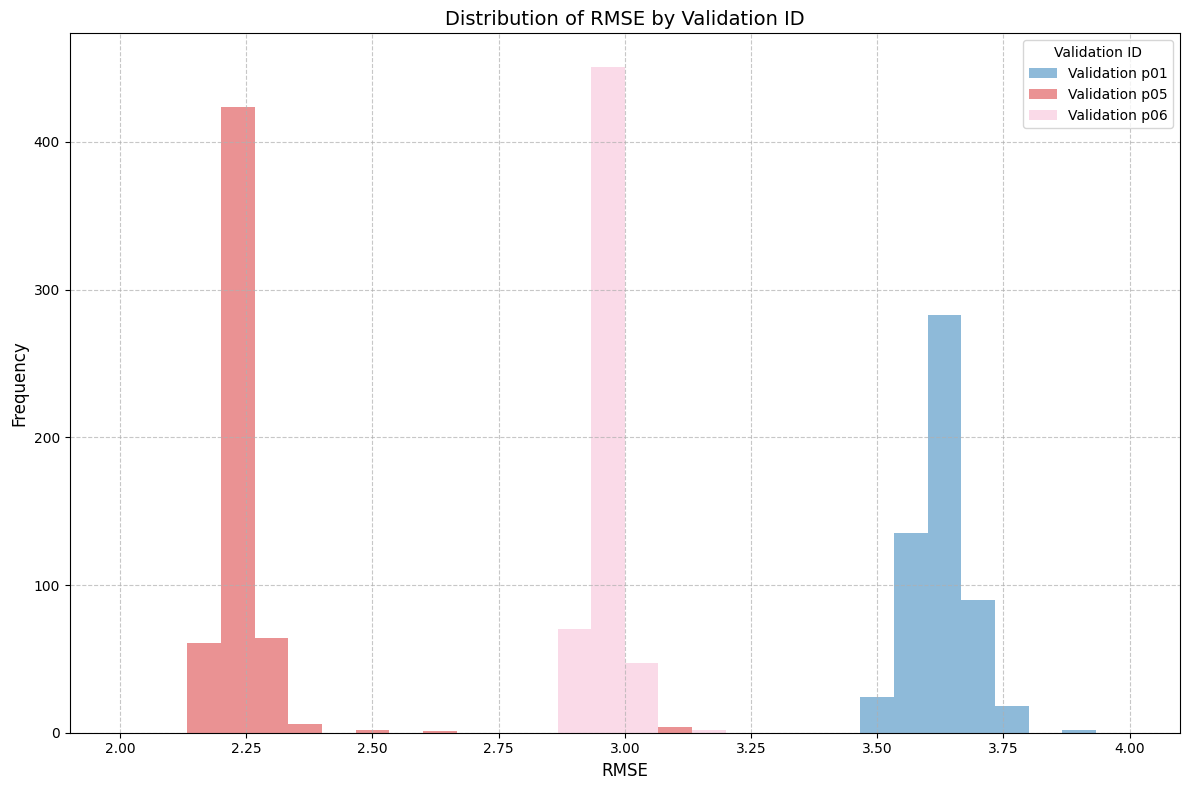

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Get unique validation IDs
unique_validations = sorted(df_reduced_nox_nohar["validation_id"].unique())
num_validations = len(unique_validations)

# Calculate number of bins based on data
num_bins = 30
x_range = (2, 4)
# Create histogram for each validation_id
for i, val_id in enumerate(unique_validations):
    mask = df_reduced_nox_nohar["validation_id"] == val_id
    plt.hist(
        df_reduced_nox_nohar[mask]["MeanSquaredError_mean"],
        bins=num_bins,
        range=x_range,
        alpha=0.5,
        label=f"Validation {val_id}",
        color=plt.cm.tab20(i / num_validations),
    )

# Customize the plot
plt.xlabel("RMSE", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of RMSE by Validation ID", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Validation ID")

plt.tight_layout()
plt.show()

### Understanding the Impact of Lags

In [50]:
df_reduced_nox_nohar = df_reduced_nox_nohar[df_reduced_nox_nohar["mean"] != "HAR"]
print(
    df_reduced_nox_nohar.groupby(["validation_id", "mean", "vol", "dist"])[
        "MeanSquaredError_mean"
    ].min()
)

validation_id  mean  vol     dist  
p01            AR    EGARCH  ged       3.519629
                             normal    3.555104
                     GARCH   ged       3.539356
                             normal    3.513732
p05            AR    EGARCH  ged       2.201384
                             normal    2.161843
                     GARCH   ged       2.179972
                             normal    2.191760
p06            AR    EGARCH  ged       2.942513
                             normal    2.913050
                     GARCH   ged       2.944273
                             normal    2.921829
Name: MeanSquaredError_mean, dtype: float64


In [54]:
df_reduced_nox_nohar_gaussian = df_reduced_nox_nohar[
    df_reduced_nox_nohar["dist"] == "normal"
]
print(
    df_reduced_nox_nohar_gaussian.groupby(["validation_id", "mean", "vol", "dist"])[
        "MeanSquaredError_mean"
    ].min()
)

validation_id  mean  vol     dist  
p01            AR    EGARCH  normal    3.555104
                     GARCH   normal    3.513732
p05            AR    EGARCH  normal    2.161843
                     GARCH   normal    2.191760
p06            AR    EGARCH  normal    2.913050
                     GARCH   normal    2.921829
Name: MeanSquaredError_mean, dtype: float64
